<a href="https://colab.research.google.com/github/CelikAbdullah/my-deep-learning-notebooks/blob/main/image%20classification/Image_Classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the MNIST data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# Prepare the data

In [3]:
num_classes = 10
input_shape = (28, 28, 1)


x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Building the model

In [10]:
inputs = keras.Input(shape=input_shape)
x = keras.layers.Conv2D(32, kernel_size=3, activation="relu")(inputs)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(64, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(rate=0.5)(x)
outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

mnist_model = keras.Model(inputs=inputs, outputs=outputs)
mnist_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0   

# Compile the model

In [11]:
mnist_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Setting some callbacks

In [12]:
callbacks = [
             keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/mnist/model_for_mnist_img_classification.h5", 
                                             save_best_only=True, 
                                             monitor ="val_loss"), 
             keras.callbacks.EarlyStopping(patience=10)
]

# Train the model

In [13]:
batch_size = 128
epochs = 100

history_mnist_model = mnist_model.fit(x_train, 
                                      y_train, 
                                      batch_size=batch_size, 
                                      epochs=epochs, 
                                      validation_split=0.1, callbacks=callbacks)

Epoch 1/100
422/422 [==============================] - 39s 92ms/step - loss: 0.3662 - accuracy: 0.8896 - val_loss: 0.0823 - val_accuracy: 0.9788
Epoch 2/100
422/422 [==============================] - 38s 91ms/step - loss: 0.1136 - accuracy: 0.9649 - val_loss: 0.0575 - val_accuracy: 0.9837
Epoch 3/100
422/422 [==============================] - 38s 91ms/step - loss: 0.0853 - accuracy: 0.9735 - val_loss: 0.0482 - val_accuracy: 0.9868
Epoch 4/100
422/422 [==============================] - 39s 91ms/step - loss: 0.0731 - accuracy: 0.9774 - val_loss: 0.0445 - val_accuracy: 0.9880
Epoch 5/100
422/422 [==============================] - 39s 92ms/step - loss: 0.0644 - accuracy: 0.9805 - val_loss: 0.0386 - val_accuracy: 0.9883
Epoch 6/100
422/422 [==============================] - 38s 91ms/step - loss: 0.0572 - accuracy: 0.9823 - val_loss: 0.0392 - val_accuracy: 0.9887
Epoch 7/100
422/422 [==============================] - 39s 93ms/step - loss: 0.0524 - accuracy: 0.9837 - val_loss: 0.0337 - val_ac

# Plotting the results

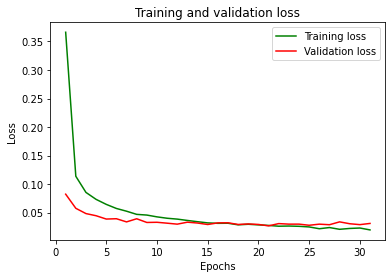

In [18]:
history = history_mnist_model.history

train_loss = history["loss"]
val_loss = history["val_loss"]

train_acc = history["accuracy"]
val_acc = history["val_accuracy"]

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, linestyle="solid", color="green", label="Training loss")
plt.plot(epochs, val_loss, linestyle="solid", color="red", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

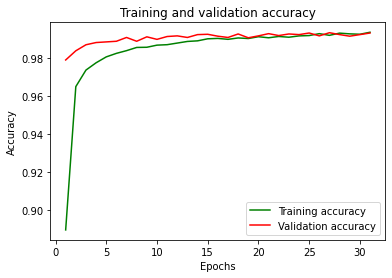

In [19]:
plt.clf()
plt.plot(epochs, train_acc, linestyle="solid", color="green", label="Training accuracy")
plt.plot(epochs, val_acc, linestyle="solid", color="red", label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

# Load the model

In [21]:
mnist_model = keras.models.load_model("/content/drive/MyDrive/mnist/model_for_mnist_img_classification.h5")

# Evaluate the model

In [22]:
test_loss, test_accuracy = mnist_model.evaluate(x=x_test, y=y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0237 - accuracy: 0.9920


In [23]:
print(f"Test accuracy on new unseen data is {test_accuracy * 100}%")

Test accuracy on new unseen data is 99.19999837875366%


# Predictions

In [48]:
# Creating a list of all the class labels
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [51]:
# Making the Predictions
pred = mnist_model.predict(x_test)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

[[1.02838305e-09 4.91193891e-12 2.85021815e-06 ... 9.99996185e-01
  6.90126489e-09 4.02234861e-07]
 [1.46708800e-07 3.35534693e-08 9.99999404e-01 ... 1.37426322e-12
  8.36837231e-08 2.06640538e-11]
 [2.50933823e-07 9.99655485e-01 6.15921181e-06 ... 2.06061686e-05
  8.27922213e-06 1.04985055e-07]
 ...
 [3.63550742e-14 2.78945356e-12 2.56054271e-12 ... 3.00256986e-10
  2.80965821e-07 1.75499668e-08]
 [5.24939958e-09 3.16990391e-14 6.71272316e-10 ... 1.67739886e-13
  3.41662853e-05 2.30311716e-08]
 [9.73069945e-08 2.65267561e-12 2.96333496e-06 ... 1.11697889e-13
  3.17803665e-06 5.56724833e-10]]
[7 2 1 ... 4 5 6]


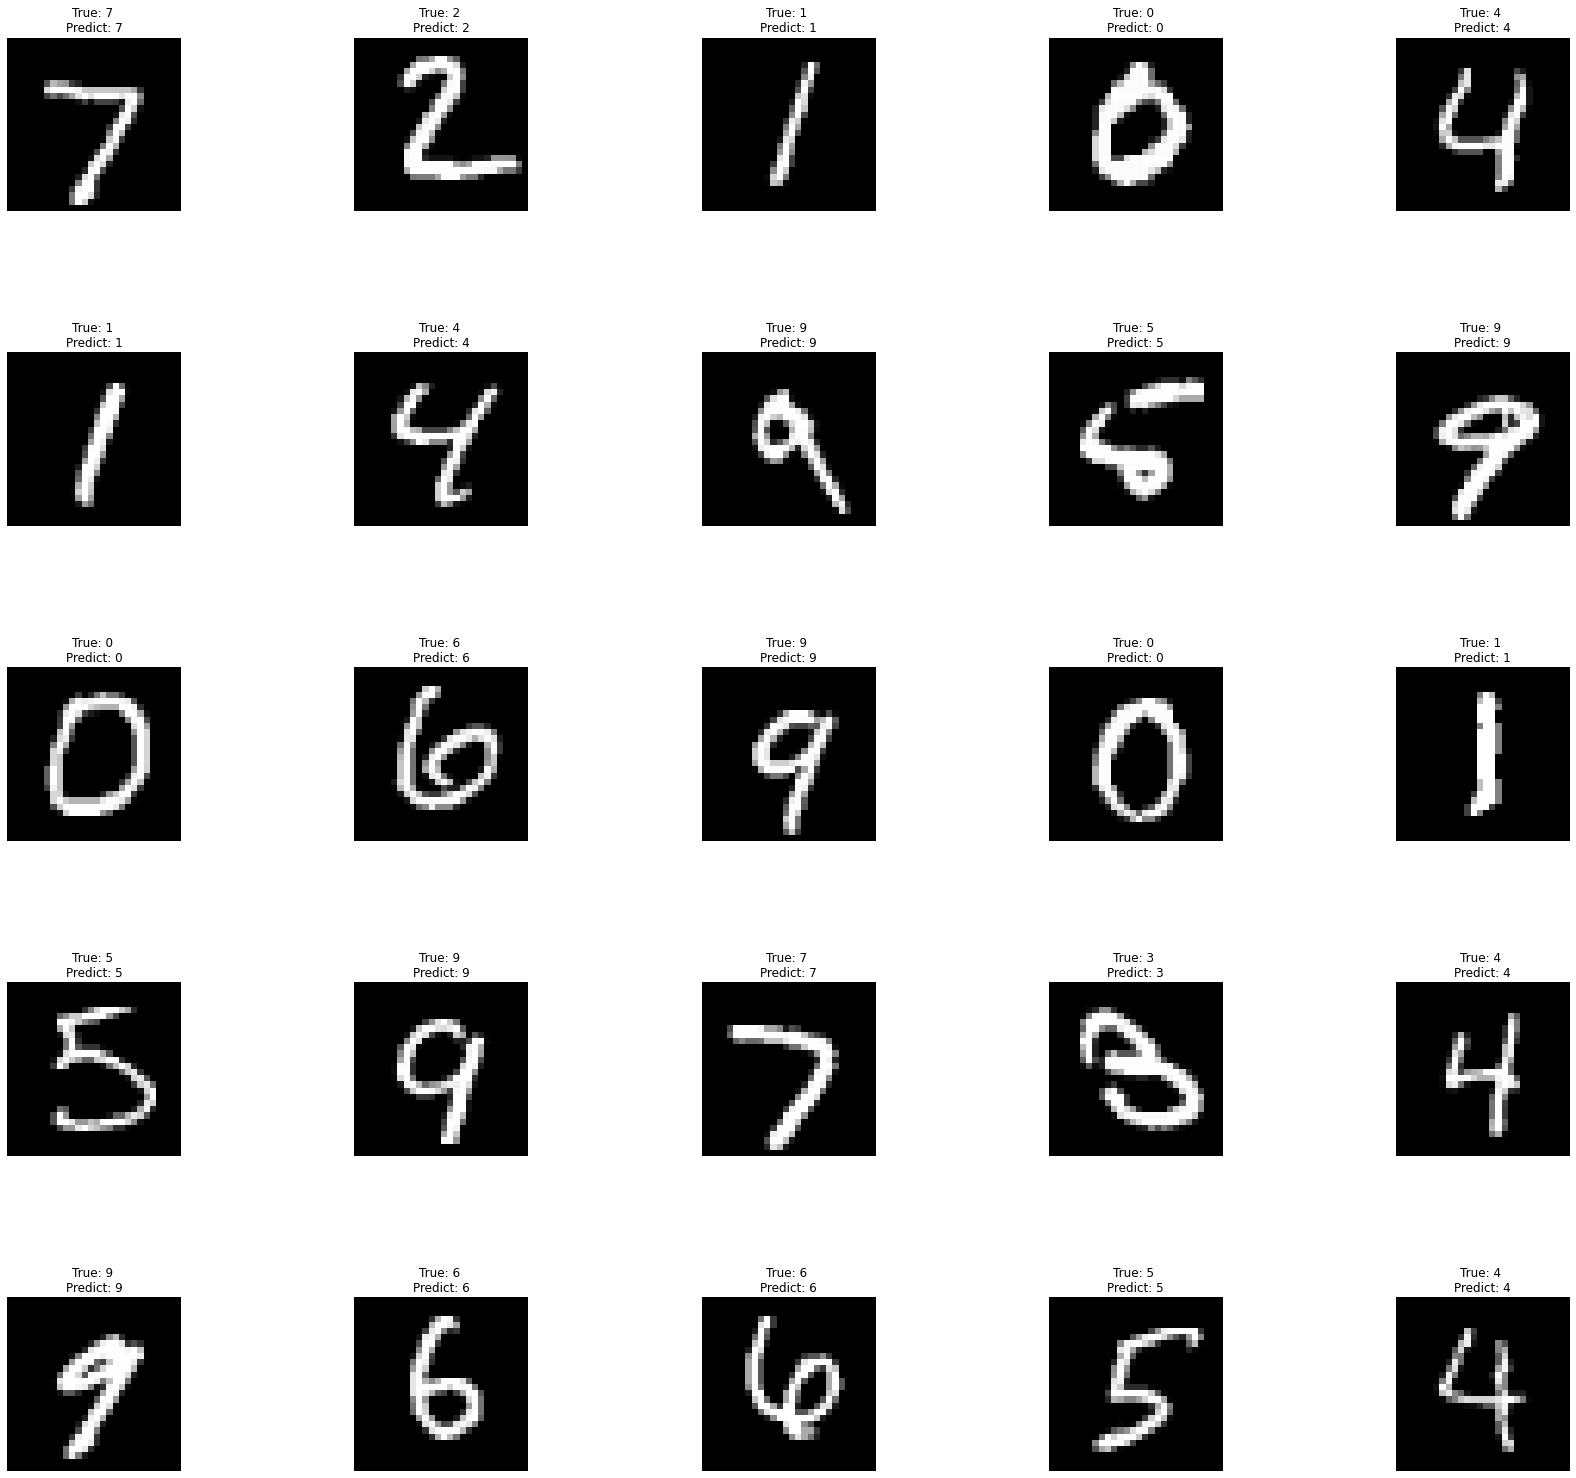

In [54]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(28,28))
axes = axes.ravel()

for i in np.arange(0, 25):
  image = x_test[i] 
  image = image[:, :, 0]

  axes[i].imshow(image, cmap='gray')
  axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[pred_classes[i]]))
  axes[i].axis('off')
  plt.subplots_adjust(wspace=1)